### 결정트리(Decision Tree) 모델의 시각화

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')   # 경고화면 무시하기

In [6]:
# 데이터 로딩, 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)

In [7]:
# 모델 생성 
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [8]:
# 모델의 시각화

# 시각화에 필요한 dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(
      dt_clf   # 학습한 모델(fitting 완료된 모델)
    , out_file='tree.dot'  # 저장할 dot 파일 이름, notebook 동일 폴더에 생성된다.
    , class_names=iris_data.target_names
    , feature_names=iris_data.feature_names
    , impurity=True
    , filled=True
)

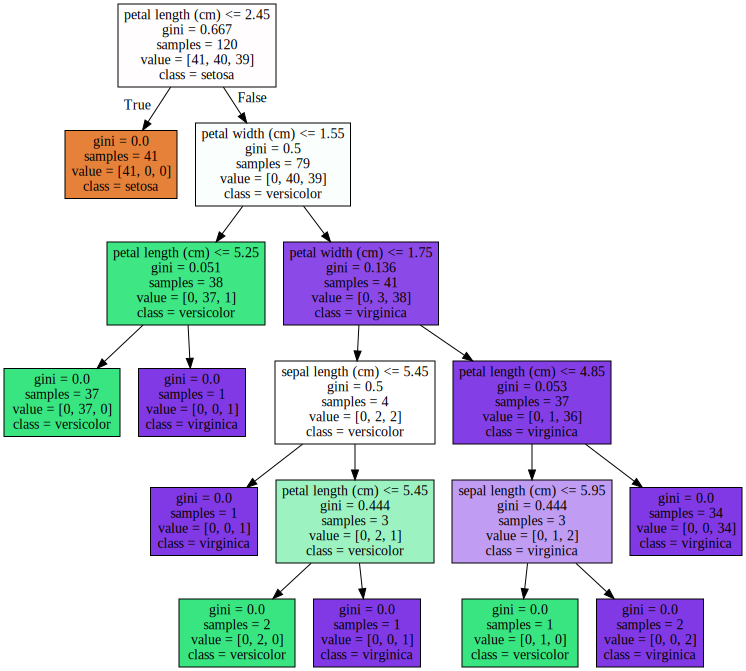

In [9]:
# 그래프 시각화
import graphviz
 
# f=open('tree.dot')
# # 처리코드
# f.close()

# 위 코드와 같은 파일 열고닫는 역할 수행하는 with 사용
with open('tree.dot') as f:
    dot_graph=f.read()   # 전체를 읽는다
    
graphviz.Source(dot_graph)

#### 위 모델은 overfitting 된 상태
- leaf node(결정노드) 의 지니계수들이 전부 0이다. => 일반화 성능이 떨어진다
- 하이퍼 파라미터 조절하여 일반화 성능 올려야 한다.=> GridSearchCV 로 최적 파라미터 찾기

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# feature 의 중요도 추출
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [13]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# 피처별 중요도 출력
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}, {1:.3f}'.format(name, value))

sepal length (cm), 0.025
sepal width (cm), 0.000
petal length (cm), 0.555
petal width (cm), 0.420


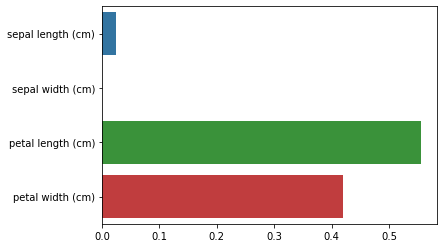

In [17]:
sns.barplot(
      x=dt_clf.feature_importances_  # 중요도 값
    , y=iris_data.feature_names   # 컬럼 이름
)
plt.show()

### 결정 트리 과적합 예제

In [18]:
# 임의의 데이터로 예제 처리
# feature : 2개, 답 : 3개 임의의 데이터 생성(make_classification)

from sklearn.datasets import make_classification

In [22]:
# 데이터 생성
X_features, y_labels = make_classification(
      n_features=2, n_redundant=0, n_informative=2
    , n_classes=3, n_clusters_per_class=1, random_state=0
)

In [23]:
X_features[:5], y_labels[:5]

(array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023]]),
 array([0, 1, 1, 1, 2]))

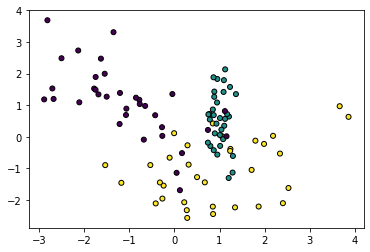

In [24]:
# 그래프 형태로 시각화
plt.scatter(
      X_features[:,0]  # X 축에 들어갈 데이터 지정
    , X_features[:,1]  # Y 축에 들어갈 데이터 지정
    , marker='o'
    , c=y_labels  # 답 3개 class 값:  0,1,2
    , s=25
    , edgecolors='k'
)

### 결정트리 실습 - 사용자 행동인식 데이터 세트

In [25]:
# 데이터 추출 => feature_name_df : 피처이름 DF
feature_name_df = pd.read_csv(
    './data/HAR/features.txt'
    , sep='\s+'    # 공백 인식하는 메타문자사용( 공백과, \n 으로 구분)
    , header=None
    , names=['column_index', 'column_name']
)
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [33]:
# 피처명 추출
feature_name=feature_name_df.iloc[:, 1].values.tolist()

In [29]:
type(feature_name_df.iloc[:, 1].values)

numpy.ndarray

In [32]:
feature_name_df.iloc[:, 1].values.tolist()[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [34]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [80]:
# HRA 데이터셋을 가져오는 function 생성
def get_human_dataset():
    # feature 이름 가져오기
    feature_name_df = pd.read_csv('./data/HAR/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    feature_name=list(set(feature_name_df.iloc[:,1].values.tolist()))
    
    # 학습 피처 데이터세트와 테스트 데이터 세트 DF 로 로딩
    X_train=pd.read_csv(
        './data/HAR/train/X_train.txt'
        ,sep='\s+'
        #,names = feature_name  # 컬럼명 지정
        ,header=None
    )
    X_test=pd.read_csv('./data/HAR/test/X_test.txt', sep='\s+', header=None
                      # ,names=fn
                      )
    
    
    # 레이블 데이터를 DF로 로딩
    y_train=pd.read_csv(
        './data/HAR/train/y_train.txt'
        ,sep='\s+'
        ,names=['action']  # 컬럼명 지정
    )
    y_test=pd.read_csv('./data/HAR/test/y_test.txt', sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test

In [81]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [82]:
feature_name=feature_name_df.iloc[:, 1].values.tolist()
X_train.columns=feature_name
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [83]:
X_test.columns=feature_name
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [84]:
y_train.head(3)

,action
0,5
1,5
2,5


In [85]:
y_test.head(3)

,action
0,5
1,5
2,5


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [87]:
# 학습데이터 답의 분포
y_train['action'].value_counts()
# 답이 균일하게 분포되어있다. => 균형 데이터셋 : 평가지표로 '정확도'를 사용할수 있다.

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [88]:
# 모델 생성, 학습, 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # 정확도 성능평가 지표사용

In [93]:
# 디폴트 모델 생성
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accu))

결정 트리 예측 정확도 : 0.8548


In [94]:
# 파라미터 디폴트 처리 => 파라미터 확인
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

- 'max_depth' : None => 지정한 게 없다

In [95]:
# 교차검증, 베스트 파라미터 추출 : GridSearchCV

from sklearn.model_selection import GridSearchCV

params={
      'max_depth':[4,6,8,10,12,16,20,24]
}
# GridSearchCV 객체만 생성
grid_cv=GridSearchCV(
      dt_clf   # 1. 적용할 모델 객체
    , param_grid=params  # 2. 적용할 파라미터
    , scoring='accuracy'  # 3. 적용할 평가 지표
    , cv = 5  # 4. 교차겁증 개수 지정(비복원 추출= 중복추출X)
    , verbose=1  # 출력결과 형태 지정
)

# 학습
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [4, 6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [96]:
# 교차검증, 베스트 파라미터 추출 : GridSearchCV

from sklearn.model_selection import GridSearchCV

params={
      'max_depth':[4,6,8,10,12,16,20,24]
}
# GridSearchCV 객체만 생성
grid_cv=GridSearchCV(
      dt_clf   # 1. 적용할 모델 객체
    , param_grid=params  # 2. 적용할 파라미터
    , scoring='accuracy'  # 3. 적용할 평가 지표
    , cv = 5  # 4. 교차겁증 개수 지정(비복원 추출= 중복추출X)
    , verbose=0  # 출력결과 형태 지정
)

# 학습
grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [4, 6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy')

- verbose =1 을 주면 작업중 내용을 간단히 표시해준다

In [97]:
# 정확도 출력
grid_cv.best_score_

0.8513444970102249

In [98]:
# 베스트 파라미터 출력
grid_cv.best_params_

{'max_depth': 16}

In [99]:
# 베스트 점수, 파라미터 값을 한번에 출력
cv_result_df=pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [100]:
# max_depth와 그에 따른 test_score만 가져오기.
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,4,0.843178
1,6,0.850791
2,8,0.851069
3,10,0.851209
4,12,0.844135
5,16,0.851344
6,20,0.850800
7,24,0.849440


In [101]:
# 베스트 모델 : grid_cv.best_estimator_  => max_depth=16
# 파라미터를 반복 처리해서 정확도 출력

max_depths=[4,6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(
          max_depth=depth
        , random_state=156
    )
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    print('max_depth={0}, 정확도: {1:.4f}'.format(depth, accu))

max_depth=4, 정확도: 0.8096
max_depth=6, 정확도: 0.8558
max_depth=8, 정확도: 0.8707
max_depth=10, 정확도: 0.8673
max_depth=12, 정확도: 0.8646
max_depth=16, 정확도: 0.8575
max_depth=20, 정확도: 0.8548
max_depth=24, 정확도: 0.8548


- 여기서는 최적 max_depth는 8로 위 GridSearchCV 와 다르다.

In [102]:
# parameter : max_depth, min_samples_split
params={
     'max_depth': [8,10,12,16,20]   # 위에서 20, 24의 정확도가 동일하다. 즉 24는 의미없으니까 삭제
    ,'min_samples_split' : [16,24]
}

grid_cv= GridSearchCV(
    dt_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=5          # cv는 보통 5, 주고 홀수를 주는 것이 일반적
    , verbose=1
)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 10, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [103]:
grid_cv.best_score_

0.8548794147162603

In [104]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [105]:
# best model object
best_grid_clf = grid_cv.best_estimator_
pred1=best_grid_clf.predict(X_test)
accu=accuracy_score(y_test, pred1)
accu

0.8717339667458432

In [109]:
# parameter : max_depth, min_samples_split
params={
     'max_depth': [6, 8,10]   # 위에서 20, 24의 정확도가 동일하다. 즉 24는 의미없으니까 삭제
    ,'min_samples_split' : [12,14]
}

grid_cv= GridSearchCV(
    dt_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=5          # cv는 보통 5, 주고 홀수를 주는 것이 일반적
    , verbose=1
)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   58.3s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [12, 14]},
             scoring='accuracy', verbose=1)

In [110]:
grid_cv.best_score_

0.8552873005082386

In [111]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 14}

In [112]:
# best model object
best_grid_clf = grid_cv.best_estimator_
pred1=best_grid_clf.predict(X_test)
accu=accuracy_score(y_test, pred1)
accu

0.8727519511367492

In [113]:
# 피처 중요도 : 561개 중에 중요도가 높은 피처 20개만 출력
import seaborn as sns

ftr_imp_values=best_grid_clf.feature_importances_
len(ftr_imp_values)


561

In [124]:
# ndarray=> Series 변환=>정렬
ftr_imp = pd.Series(
    ftr_imp_values           #1. Series로 만들 value : 중요도 값
    , index=X_train.columns  # 2. 인덱스에 넣을 value
)

In [127]:
# 정렬해서 상위 20개 추출
ftr_top20 = ftr_imp.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-min()-X                0.253242
fBodyAccJerk-bandsEnergy()-1,16    0.212489
angle(Y,gravityMean)               0.138939
fBodyAccMag-energy()               0.115427
tGravityAcc-arCoeff()-Z,2          0.101840
fBodyGyro-maxInds-X                0.023960
tBodyGyro-correlation()-Y,Z        0.016506
tGravityAcc-energy()-Y             0.016426
tGravityAccMag-arCoeff()1          0.012607
tBodyAcc-correlation()-X,Y         0.009351
fBodyAcc-max()-Y                   0.008821
tBodyGyro-max()-X                  0.008546
tGravityAcc-max()-Y                0.006288
tGravityAcc-min()-Y                0.006111
fBodyGyro-max()-X                  0.005244
tBodyGyro-min()-X                  0.004371
tBodyAccJerk-correlation()-X,Y     0.003965
tBodyGyroJerk-max()-X              0.003470
tBodyAccMag-arCoeff()1             0.003128
tGravityAcc-arCoeff()-Y,3          0.003023
dtype: float64

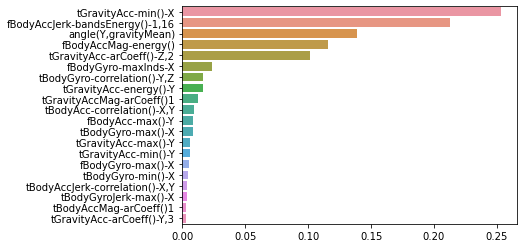

In [128]:
sns.barplot(
      x=ftr_top20
    , y=ftr_top20.index # feature 명
)